In [1]:
import pandas as pd, numpy as np
import h5py
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import io

import glob, os

metadata_path = 'metadata_rijks.csv'
datasets_path = 'datasets/'
images_path = 'images/'

metadata = pd.read_csv(metadata_path, sep='|')

metadata.dropna(inplace=True)
metadata = metadata[~metadata['fullname_creator'].str.contains('anoniem')]
metadata = metadata[metadata['fullname_creator'] != ' ']

df_images = pd.DataFrame({'filename': os.listdir(images_path)})
df_images['image_id'] = df_images['filename'].str.replace('.jpg','')

metadata = pd.merge(metadata, df_images, on='image_id')

encoder = LabelEncoder()

metadata['fullname_creator_cat'] = encoder.fit_transform(metadata['fullname_creator'].astype(str))
metadata['material_cat'] = encoder.fit_transform(metadata['material'].astype(str))
metadata['type_cat'] = encoder.fit_transform(metadata['type'].astype(str))

df_train, df_val = train_test_split(metadata, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_val, test_size=0.2, random_state=42)

df_train.reset_index(inplace=True)
df_val.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [2]:
metadata

,No,image_id,name_art_piece,fullname_creator,material,type,filename,fullname_creator_cat,material_cat,type_cat
0,1,0000001_SK-A-4878,Een jonge vrouw haar handen warmend boven een ...,"Everdingen, Caesar Boëtius van",olieverf,schilderij,0000001_SK-A-4878.jpg,1873,86,387
1,2,0000002_SK-A-4877,Portret van Jacob Maris,"Maris, Matthijs",papier,schilderij,0000002_SK-A-4877.jpg,3783,90,387
2,3,0000003_SK-A-4881,"Portret van een jonge man, waarschijnlijk Simo...","Maes, Nicolaes",olieverf,schilderij,0000003_SK-A-4881.jpg,3737,86,387
3,4,0000004_RP-P-1992-35,Keizer Karel V omgeven door zijn overwonnen te...,"Coornhert, Dirck Volckertsz",papier,prent,0000004_RP-P-1992-35.jpg,1290,90,341
4,5,0000005_RP-P-1992-36,Gevangename van Frans I tijdens de slag van Pa...,"Coornhert, Dirck Volckertsz",papier,prent,0000005_RP-P-1992-36.jpg,1290,90,341
...,...,...,...,...,...,...,...,...,...,...
94663,112005,0112380_RP-P-2011-173-1,"Apostel Jacobus Maior, allegorie op tabak","Fellmann, M.",papier,prent,0112380_RP-P-2011-173-1.jpg,1915,90,341
94664,112006,0112381_RP-T-1886-A-704-26,Berglandschap,"Bramer, Leonaert",papier,tekening,0112381_RP-T-1886-A-704-26.jpg,773,90,455
94665,112036,0112411_RP-P-OB-86.512,Beschieting van het Nederlandse oorlogsschip M...,"Bos, Maarten",papier,prent,0112411_RP-P-OB-86.512.jpg,684,90,341
94666,112038,0112413_NG-NM-8358,Hartsvanger van Schout bij nacht J.A. Zoutman,"Coenraads, Jacobus (Senior)",ijzer,hartsvanger,0112413_NG-NM-8358.jpg,1230,52,155


Folkema, Jacob papier prent


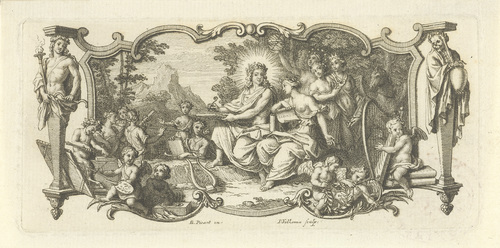

In [6]:
i = 199
with h5py.File('datasets/training.hdf5', 'r') as f:
    print(f['fullname_creator'][i], f['material'][i], f['type'][i])
    img = Image.open(io.BytesIO(f['images'][i])).convert('RGB')
img

In [32]:
def num_classes(path_list, challenge):
    m = 0
    for p in path_list:
        with h5py.File(p, 'r') as f:
            ml = max(np.array(f[challenge]).astype(int))
            if ml > m:
                m = ml
    return m+1
        

In [35]:
path_list = ['datasets/training.hdf5', 'datasets/testing.hdf5', 'datasets/validation.hdf5']
num_classes(path_list, 'material_cat')

128

In [40]:
metadata.to_csv('metadata_rijks_enc.csv')

In [38]:
pd.read_hdf('datasets/testing.hdf5', key='material', mode='r')

TypeError: cannot create a storer if the object is not existing nor a value are passed